<a href="https://colab.research.google.com/github/Da-Heon/MachineLearning/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/drive/MyDrive/데이터 분석/파이썬 머신러닝 완벽 가이드/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- passengerid : 탑승자 데이터 일련번호
- survived : 생존여부(0=사명, 1=생존)
- pclass : 선실 등급(1=일등석, 2=이등석, 3=삼등석)
- sex : 성별
- name : 이름
- age : 나이
- sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
- parch : 같이 탑승한 부모님 또는 어린이 인원수
- tickets : 티켓 번호
- fare : 요금
- cabin : 선실 번호
- embarked : 중간 정착 항구(C=Cherbourg, Q=Qeenstown, S=Southampton)

In [6]:
print('\n### 학습 데이터 정보 ###\n')
print(df.info())


### 학습 데이터 정보 ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# 필요한 API 불러오기
!pip install koreanize_matplotlib

%config lineBackendin.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.2 MB/s eta 0:00:00


- 사이킷런 머신러닝 알고리즘은 null 값을 허용하지 않으므로 nul 값을 어떻게 처리할지 결정해야 합니다
- 여기서는 fillna() 함수를 사용해서 간단하게 null 값을 평균 또는 고정값으로 변경하겠습니다
- age는 평균 나이, 나머지는 N으로 변경합니다
- 그 다음 null값이 없는지 다시 확인해보겠습니다

In [8]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)  # 평균으로 채우기
df['Cabin'].fillna('N', inplace=True)  # N값으로 대체
df['Embarked'].fillna('N', inplace=True)  # N값으로 대체
print(f'데이터 세트 NULL 값 개수 : {df.isna().sum().sum()}개')

데이터 세트 NULL 값 개수 : 0개


<ipython-input-9-60dc36ad10f6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)  # 평균으로 채우기
<ipython-input-9-60dc36ad10f6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

### 문자열 피처 값 확인

In [10]:
print('sex값 분포 : \n', df['Sex'].value_counts())
print('cabin값 분포 : \n', df['Cabin'].value_counts())
print('Embarked값 분포 : \n', df['Embarked'].value_counts())

sex값 분포 : 
 Sex
male      577
female    314
Name: count, dtype: int64
cabin값 분포 : 
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64
Embarked값 분포 : 
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


- N이 687건으로 가장 많은 것이 특이합니다
- cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보입니다
- 일등식에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아갈 확률이 높았을 것이기에 앞 문자만 추출해 보겠습니다

In [11]:
df['Cabin'] = df['Cabin'].str[:1]
print(df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


# 어떤 유형의 승객이 생존 확률이 높을까?

- 여성과 아이들, 그리고 노약자가 제일 먼저 구조 대상입니다.
- 그리고 아마도 부자나 유명인이 다음 구조 대상이었을 것입니다.
- 성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교해 보겠습니다

In [12]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- 탑승객은 남자가 577명, 여자가 314명으로 남자가 더 많습니다.
- 여자는 314명 중 233명으로 약 74%가 생존했지만 남자의 경우에는 468명이 죽고 109명이 살아남아 약 18.8%가 생존했습니다

<Axes: xlabel='Sex', ylabel='Survived'>

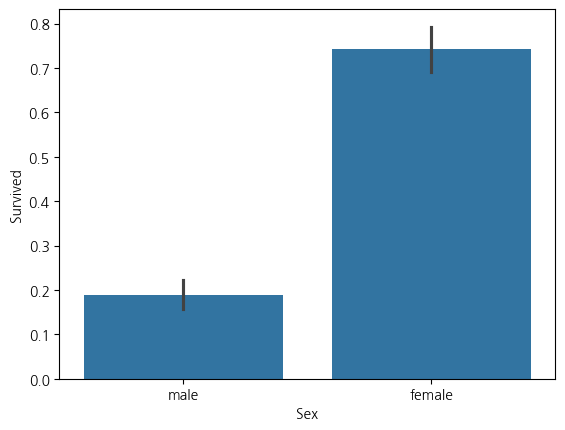

In [13]:
sns.barplot(x='Sex', y='Survived', data=df)

# 부자와 가난한 사람 간의 생존 확률은?

<Axes: xlabel='Pclass', ylabel='Survived'>

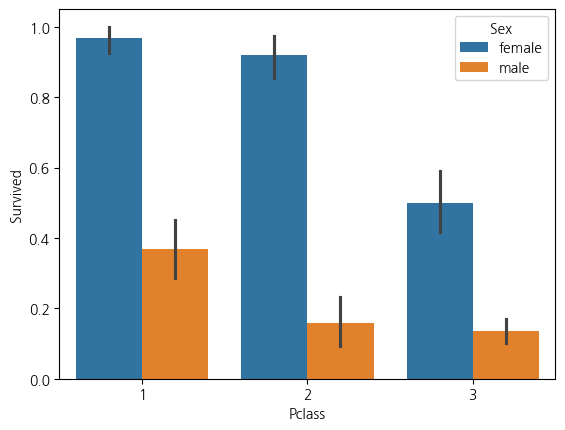

In [14]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

- 여성의 경우 일,이등실에 따른 생존 확률의 차이가 크지 않았으나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐을 알 수 있습니다.
- 남성의 경우는 일등실의 생존 확률이 이,삼등실의 생존 확률보다 월등히 높습니다

- age 값은 나이가 많기 때문에 카테고리 값을 할당하겠습니다

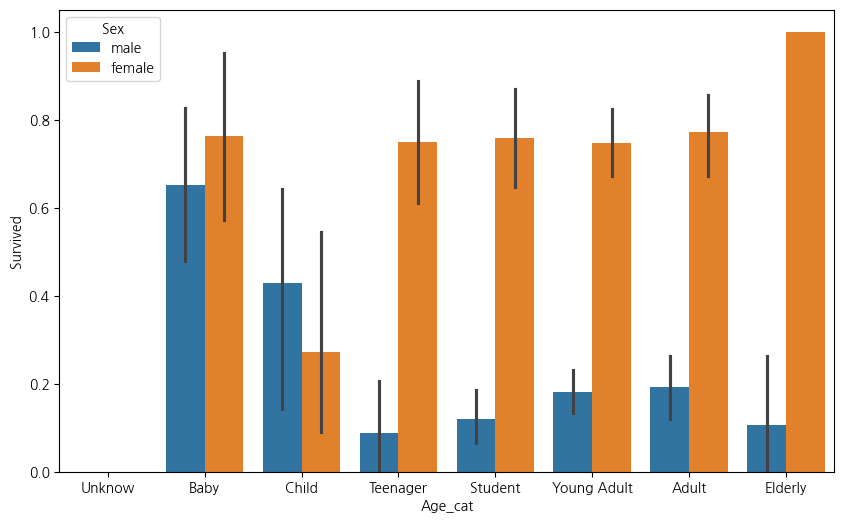

In [15]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정
def get_category(age):
    cat =''
    if age <= -1 : cat = 'Unknow'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'

    return cat

# 막대그래프의 크기 설정
plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknow', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 함수를 반환값으로 설정
# get_category(x)는 입력값으로 age컬럼 값을 받아서 해당하는 cat로 반환
df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=df, order=group_names)
df.drop('Age_cat', axis=1, inplace=True)

- sex, age, pclass 등이 중요하게 생존을 좌우하는 피처임을 어느 정도 확인할 수 있었습니다

- 이제 남아있는 문자열 카테고리 피처를 수자형 카테고리 피처로 변환하겠습니다
- 인코딩은 사이킷런의 LabelEncoder 클래스를 사용해 레이블 인코딩을 적용하겠습니다
- 객체는 카테고리의 값 유형 수에 따라 0 ~ (카테고리 우형수 -1)까지의 숫자 값으로 변환합니다
- encode_features() 함수를 새로 생성해 한 번에 변환하도록 하겠습니다

In [16]:
# 생존 확률을 좌우하는 피처값들을 라벨 인코딩 하는 코드
# 숫자형으로 변환하는 함수

from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Sex', 'Cabin', 'Embarked']
    for fea in features:
        le = LabelEncoder()
        le = le.fit(dataDF[fea])
        dataDF[fea] = le.transform(dataDF[fea])

    return dataDF

df = encode_features(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


- sex, cabin, embarked 피처값이 숫자형으로 바뀐 것을 알 수 있습니다

- 피처를 가공한 내역을 정리하는 함수를 만들어보겠습니다
- 데이터의 전처리를 전체적으로 호풀하는 함수는 transform_features() 이며 null 처리, 불빌요한 피처 제거
, 인코딩을 수행하는 내부 함수로 구성
- 불필요한 피처 제거는 drop_features(df)로 수행하며 머신러닝 알고리즘에 불필요한, 단순한 식별자 수준의 피처인 passengerid, name, ticket 피처를 제거합니다

In [17]:
# 전처리 함수 만들기

# null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True) # Cabin 열의 None 값을 'N'으로 채웁니다.
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불피요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]  # 첫 글자로 변환
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()  # 객체를 변수에 지정
        le = le.fit(df[feature])  # 지정된 변수에 모델 학습(위의 리스트에 해당하는 컬럼들을)
        df[feature] = le.transform(df[feature])  # 학습만 모델을 최종 값으로 변환
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df=  drop_features(df)
    df = format_features(df)
    return df

- 데이터 전처리 수행하는 함수를 만들었으니 이 함수를 이용해 다시 원본 데이터를 가공해 보겠습니다

In [19]:
# 원본 데이터 재로딩하고, 피처 데이터 세트와 데이터 세트 추출
titanic_df = pd.read_csv('/content/drive/MyDrive/데이터 분석/파이썬 머신러닝 완벽 가이드/train.csv')
y_titanic_df = titanic_df['Survived']  # 타겟 변수 지정(내가 알고싶은 값)
X_titanic_df = titanic_df.drop('Survived', axis=1)  # 타겟 변수를 제외한 나머지 데이터 프레임을 피처값으로 지정(레이블 데이터)

X_titanic_df = transform_features(X_titanic_df)  # 전처리 된 피처 데이터

<ipython-input-17-6dca1aae37c8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-17-6dca1aae37c8>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

- 내려받은 학습 데이터 세트르 기반으로 해서 테스트 데이터 생성

In [21]:
# X_titanic_df, y_titanic_df 데이터를 분할

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_titanic_df, y_titanic_df, test_size=0.2, random_state=11
)

- 결정트리
- 랜덤 포레스트
- 로지스틱 회귀
- 위를 이용해 생존자 예측을 해보곘습니다

- 분리한 학습 데이터와 테스트 데이터를 기반으로
- 모델을 학습하고(fit)
- 예측(predict) 할 것입니다
- 예측 성능은 정확도로 할 것이며 이를 위해 accuracy_score를 사용합니다
- `solver='liblinear'`는 로지스틱 회구의 최적화 알고리즘을 설정한 것입니다
    - 일반적으로 작은 데이터 세트에서의 이진 분류는 'liblinear'가 성능이 약간 더 좋은 경향이 있습니다

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
# 결정트리, 랜덤포레스트, 로지스틱 회귀를 위한 사이킷런 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

In [24]:
# DecisionTreeClassifier() 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f'DecisionTreeClassifier 정확도: {accuracy_score(y_test, dt_pred)}')

DecisionTreeClassifier 정확도: 0.7877094972067039


In [25]:
# 랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f'랜덤포레스트 정확도 : {accuracy_score(y_test, rf_pred)}')

랜덤포레스트 정확도 : 0.8547486033519553


In [26]:
# 로지스틱 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f'로지스틱 정확도: {accuracy_score(y_test, lr_pred)}')

로지스틱 정확도: 0.8659217877094972


In [27]:
print(f'DecisionTreeClassifier 정확도: {round(accuracy_score(y_test, dt_pred), 4)}')
print(f'랜덤포레스트 정확도 : {round(accuracy_score(y_test, rf_pred), 4)}')
print(f'로지스틱 정확도: {round(accuracy_score(y_test, lr_pred), 4)}')

DecisionTreeClassifier 정확도: 0.7877
랜덤포레스트 정확도 : 0.8547
로지스틱 정확도: 0.8659


- 로지스틱 알고리즘이 타 모델에 ㅣ해 정확도가 높음
- 아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않기 때문에 어떤 알고리즘이 성능이 좋다 평가할 수 없음
- 다음으로는 교차 검증으로 결정 트리 모델을 좀 더 평가 해보겠습니다
- 교차 검증을 위해서는 model_selection 패키지의 KFold, cross_val_score(), GridSearch() 클래스를 모두 사용합니다

# KFold 교차 검증

- 먼저 교차 검증을 수행하며, 폴드 개수는 5개로 설정합니다

In [38]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트르 5개인 kfold 객체 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

#exec_fold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


- 평균 정확도는 약 78.23% 입니다. 이번에는 교차 검증을 cross_val_score() 를 이용해 수행합니다

### cross_val_socre()

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


### GridSearchCV

- DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정해보자
- CV는 5개의 폴드 세트를 지정하자
- max_depth, min_samples, min_samples_leaf를 변경하면서 성능을 측정하자
- Estimator를 이용해 위의 train_test_split()으로 분리된 테스트 데이터 세트에 예측을 수행해 보자

In [51]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_split' : [2, 3, 5],
    'min_samples_leaf' : [1, 5, 8]
}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTree 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.7992
테스트 세트에서의 DecisionTree 정확도: 0.8715


- 최적화된 하이퍼 파라미터로 학습시킨 뒤 예측 정확도는 87.15%로 향상